In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import time
from datetime import datetime
from datetime import datetime, timedelta
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [5]:
df = pd.DataFrame({
    'publishedAt': ['2025-07-16'],
    'title': ['JP Morgan Chase & Co. (JPM) Q2 2025 Earnings Call Transcript'],
    'sources': ['Bloomberg']
})

In [23]:
import requests
import pandas as pd

date_str = "2025-07-17"

url = "https://newsapi.org/v2/everything"
params = {
    'q': 'RBI OR USD OR INR OR Indian Rupee OR Forex',
    'sources': 'the-hindu,bloomberg,cnbc,financial-times,economic-times',
    'from': "2025-06-24",
    'to': "2025-07-17",
    'language': 'en',
    'sortBy': 'publishedAt',
    'pageSize': 5,
    'apiKey': 'cb0e07a51f4a405590d9e324f6e3b309'
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
if data.get("status") == "ok" and "articles" in data:
    articles = data["articles"]
    df = pd.DataFrame(articles)[['publishedAt', 'title','source']]
    df['source'] = df['source'].apply(lambda x: x['name'] if isinstance(x, dict) else x)
    df['date'] = date_str
else:
    df = pd.DataFrame()



In [24]:
print(df)

            publishedAt                                              title  \
0  2025-07-16T10:22:09Z  Schneider in talks to buy Temasek’s stake in I...   
1  2025-07-15T04:24:28Z  Tesla’s long-awaited India debut bets on luxur...   
2  2025-07-15T03:10:36Z  India’s key stock market players eye Jane Stre...   
3  2025-07-14T07:02:29Z  Citigroup’s India commercial banking chief Voh...   
4  2025-07-14T04:21:29Z  India pension funds said to request easier bon...   

      source        date  
0  Bloomberg  2025-07-17  
1  Bloomberg  2025-07-17  
2  Bloomberg  2025-07-17  
3  Bloomberg  2025-07-17  
4  Bloomberg  2025-07-17  


In [25]:
df.to_csv('news.csv', index=False)

In [30]:
data = pd.read_csv('news1.csv')
data1 = data.copy()

data1['publishedAt'] = pd.to_datetime(data['publishedAt']).dt.date
data1 = data1[['publishedAt', 'title', 'source']]
data1

analyzer = SentimentIntensityAnalyzer()
for i in range(len(data1)):
    sentiment = analyzer.polarity_scores(data1['title'][i])
    data1.at[i, 'Sentiment'] = sentiment['compound']

In [34]:
data1

,publishedAt,title,source,Sentiment
0,2025-06-24,India’s GDP projected to grow 7.2% as US-India...,Times of India,0.0000
1,2025-06-24,Microsoft India signs new cloud infrastructure...,Bloomberg,0.0000
2,2025-06-25,Moody’s praises India’s stable economic outloo...,Bloomberg,0.4588
3,2025-06-25,India’s central bank meets US Fed officials fo...,Reuters,0.0000
4,2025-06-26,Google invests in Indian startup focusing on r...,TechCrunch,0.0000
5,2025-06-26,India–US fintech collaboration strengthens wit...,ETNow,0.4588
6,2025-06-27,India–US fintech collaboration strengthens wit...,ETNow,0.4588
7,2025-06-27,Google invests in Indian startup focusing on r...,TechCrunch,0.0000
8,2025-06-28,India’s rupee strengthens amid strong US bond ...,BusinessLine,0.7430
9,2025-06-28,BlackRock boosts stake in major Indian infra firm,Livemint,0.3182


In [3]:
-(85)

-85

In [2]:
85 + -56

29

## Playground 0

In [2]:
df = pd.read_csv(r"C:\Users\katka\Downloads\Dollor_Predictor\USD_INR Historical Data (1).csv")

In [3]:
#df = df[::-1].reset_index(drop=True)
df


,Date,Price,Open,High,Low,Vol.,Change %
0,25-06-2025,86.040,85.937,86.148,85.791,NaN,0.07%
1,24-06-2025,86.056,86.152,86.262,85.889,NaN,-0.12%
2,23-06-2025,86.580,86.788,86.871,86.571,NaN,-0.08%
3,20-06-2025,86.580,86.684,86.698,86.530,NaN,-0.34%
4,19-06-2025,86.840,86.416,86.916,86.416,NaN,0.18%
...,...,...,...,...,...,...,...
1164,07-01-2021,73.430,73.169,73.475,73.065,NaN,0.40%
1165,06-01-2021,73.136,73.184,73.234,73.055,NaN,0.01%
1166,05-01-2021,73.130,73.065,73.291,72.987,NaN,0.07%
1167,04-01-2021,73.080,73.089,73.125,72.827,NaN,-0.06%


% preprocessing & etc

In [4]:
import pandas as pd
import random
from datetime import datetime, timedelta

df['Date'] = pd.to_datetime(df['Date']).dt.date

df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

df['Sentiment'] = 0.0

cutoff_date = datetime.today().date() - timedelta(days=30)

def scale_change_to_sentiment(change):
    change = max(min(change, 1), -1)
    base = -1*((change / 1) * 0.3)
    noise = random.uniform(-0.02, 0.02)
    return round(base + noise, 3)



for idx, row in df.iterrows():
    if row['Date'] < cutoff_date:
        scaled_sentiment = scale_change_to_sentiment(row['Change %'])
        df.at[idx, 'Sentiment'] = scaled_sentiment


C:\Users\katka\AppData\Local\Temp\ipykernel_16156\663520664.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date']).dt.date


In [5]:
print(df[:31])

          Date   Price    Open    High     Low  Vol.  Change %  Sentiment
0   2025-06-25  86.040  85.937  86.148  85.791   NaN      0.07     -0.027
1   2025-06-24  86.056  86.152  86.262  85.889   NaN     -0.12      0.048
2   2025-06-23  86.580  86.788  86.871  86.571   NaN     -0.08      0.018
3   2025-06-20  86.580  86.684  86.698  86.530   NaN     -0.34      0.120
4   2025-06-19  86.840  86.416  86.916  86.416   NaN      0.18     -0.046
5   2025-06-18  86.430  86.315  86.573  86.263   NaN     -0.12      0.049
6   2025-06-17  86.318  86.030  86.404  85.890   NaN      0.40     -0.122
7   2025-06-16  85.846  86.149  86.260  85.782   NaN      0.01      0.016
8   2025-06-13  86.108  86.164  86.217  85.924   NaN      0.07     -0.023
9   2025-06-12  85.581  85.470  85.665  85.401   NaN     -0.06      0.025
10  2025-06-11  85.468  85.560  85.631  85.412   NaN      0.10     -0.023
11  2025-06-10  85.596  85.666  85.695  85.505   NaN     -0.09      0.037
12  2025-06-09  85.670  85.803  85.813

In [7]:
analyzer = SentimentIntensityAnalyzer()

df['Date'] = pd.to_datetime(df['Date']).dt.date

BASE_URL = "https://newsapi.org/v2/everything"

for idx in df.head(15).index:
    date = df.at[idx, 'Date']

    from_date = date - timedelta(days=1)
    to_date = date + timedelta(days=1)

    params = {
        'q': 'indian rupee OR USD OR forex OR RBI OR dollar',
        'from': from_date.isoformat(),
        'to': to_date.isoformat(),
        'language': 'en',
        'sortBy': 'publishedAt',
        'pageSize': 5,
        'apiKey': 'cb0e07a51f4a405590d9e324f6e3b309'
    }


    response = requests.get(BASE_URL, params=params)
    data = response.json()

    sentiments = []

    if 'articles' in data:
        for article in data['articles']:
            title = article['title']
            score = analyzer.polarity_scores(title)['compound']
            sentiments.append(score)

    avg_sentiment = round(np.mean(sentiments), 3) if sentiments else 0.0
    df.at[idx, 'Sentiment'] = avg_sentiment

In [8]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'Sentiment'],
      dtype='object')

In [22]:
#df = pd.read_csv(r"C:\Users\katka\Downloads\Dollor_Predictor\USD_INR Historical Data (1).csv")

print(df)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['day_of_week'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month

#df['Change %'] = df['Change %'].str.replace('%','').astype(float)

#gpt suggestions
df['delta_price'] = df['Price'].diff()
df['price_pct'] = df['Price'].pct_change()
df['rolling_mean_3'] = df['Price'].rolling(3).mean()
df['volatility_3'] = df['Price'].rolling(3).std()
df['euro'] = df['Price']*0.00999962
df['pound'] = df['Price']*0.008527
df['yen'] = df['Price']*1.69146
df['sma_7'] = df['Price'].rolling(7).mean()
df['sma_21'] = df['Price'].rolling(21).mean()
df['trend_7_21'] = df['sma_7'] - df['sma_21']  
df['price_position'] = (df['Price'] - df['Price'].rolling(30).min()) / (df['Price'].rolling(30).max() - df['Price'].rolling(30).min())

df = df[::-1].reset_index(drop=True)

print(df.head())

#['Open', 'High', 'Low','Change %','day_of_week','month']
df_input = df[['Price','day_of_week','month','Sentiment','delta_price','price_pct','rolling_mean_3','volatility_3','euro','pound','yen']]
df_output = df['Change %']

df_input = df_input.dropna()
print(df_input.head())

scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)
target_scaler = MinMaxScaler()
df_output_scaled = target_scaler.fit_transform(df_output.values.reshape(-1, 1))



           Date   Price    Open    High     Low  Vol.  Change %  Sentiment  \
0    2025-06-25  86.040  85.937  86.148  85.791   NaN      0.07      0.000   
1    2025-06-24  86.056  86.152  86.262  85.889   NaN     -0.12      0.000   
2    2025-06-23  86.580  86.788  86.871  86.571   NaN     -0.08      0.000   
3    2025-06-20  86.580  86.684  86.698  86.530   NaN     -0.34      0.000   
4    2025-06-19  86.840  86.416  86.916  86.416   NaN      0.18      0.000   
...         ...     ...     ...     ...     ...   ...       ...        ...   
1164 2021-01-07  73.430  73.169  73.475  73.065   NaN      0.40     -0.105   
1165 2021-01-06  73.136  73.184  73.234  73.055   NaN      0.01      0.015   
1166 2021-01-05  73.130  73.065  73.291  72.987   NaN      0.07     -0.021   
1167 2021-01-04  73.080  73.089  73.125  72.827   NaN     -0.06      0.016   
1168 2021-01-01  73.125  73.100  73.130  73.025   NaN      0.10     -0.045   

      day_of_week  month  ...  price_pct  rolling_mean_3  volat

In [23]:
df_input.tail()

,Price,day_of_week,month,Sentiment,delta_price,price_pct,rolling_mean_3,volatility_3,euro,pound,yen
1162,86.318,1,6,0.0,-0.112,-0.001296,86.529333,0.274811,0.863147,0.736034,146.003444
1163,86.430,2,6,0.0,-0.410,-0.004721,86.616667,0.207445,0.864267,0.736989,146.192888
1164,86.840,3,6,0.0,0.260,0.003003,86.666667,0.150111,0.868367,0.740485,146.886386
1165,86.580,4,6,0.0,0.000,0.000000,86.405333,0.302532,0.865767,0.738268,146.446607
1166,86.580,0,6,0.0,0.524,0.006089,86.225333,0.307255,0.865767,0.738268,146.446607


In [24]:
X = []
y = []
sequence_len = 20

for i in range(len(df_input_scaled) - sequence_len):
    X.append(df_input_scaled[i:i+sequence_len])
    y.append(df_output_scaled[i+sequence_len])
    
X = np.array(X)
y = np.array(y)

split_idx = int(len(X)*0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

In [25]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)#, beta_1=0.9, beta_2=0.9

In [26]:
print("Original data rows:", len(df))
print("Input rows after dropna:", len(df_input))
print("Number of sequences:", len(X))


Original data rows: 1169
Input rows after dropna: 1167
Number of sequences: 1147


In [27]:
model = keras.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=(20,11)),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

c:\Users\katka\anaconda3\envs\rnn_doller\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 20, 20)         │         1,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 20)         │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 20)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,801 (30.47 KB)

 Trainable params: 7,801 (30.47 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(X_train,y_train, epochs=60,validation_data=[X_val,y_val],batch_size=20)

Epoch 1/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0492 - mean_absolute_error: 0.1755 - val_loss: 0.0054 - val_mean_absolute_error: 0.0482
Epoch 2/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0829 - val_loss: 0.0058 - val_mean_absolute_error: 0.0519
Epoch 3/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0783 - val_loss: 0.0053 - val_mean_absolute_error: 0.0479
Epoch 4/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0785 - val_loss: 0.0054 - val_mean_absolute_error: 0.0487
Epoch 5/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0802 - val_loss: 0.0054 - val_mean_absolute_error: 0.0484
Epoch 6/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0805 - val_loss: 0.0054 - val_mean_absolute_error: 0.0482
Epoch 7/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0123 - mean_absolute_error: 0.0802 - val_loss

In [30]:
import matplotlib.pyplot as plt

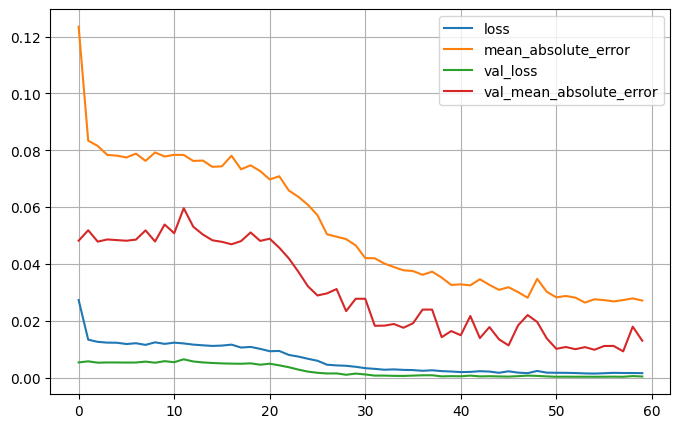

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [33]:
model.save("USD_Price_Forecst_Model_many_curr_sentiment30.h5")
model.save_weights("USD_Price_Forecst_Model_many_curr_setiment30.weights.h5")

In [34]:
import joblib

model.save("USD_Price_Forecst_Model_many_curr_sentiment_SA.h5")
model.save_weights("USD_Price_Forecst_Model_many_curr_setiment_SA.weights.h5")

joblib.dump(scaler, "input_scaler_many_curr_setiment_SA.save")
joblib.dump(target_scaler, "output_scaler_many_curr_sentiment_SA.save")


['output_scaler_many_curr_sentiment_SA.save']

In [32]:
y_pred_scaled = model.predict(X_val)
y_pred_real = target_scaler.inverse_transform(y_pred_scaled)
y_val_real = target_scaler.inverse_transform(y_val)


for i in range(10):
    print(f"Predicted: {y_pred_real[i][0]:.2f} | Actual: {y_val_real[i][0]:.2f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Predicted: 0.05 | Actual: 0.04
Predicted: 0.05 | Actual: 0.03
Predicted: 0.01 | Actual: 0.00
Predicted: -0.05 | Actual: -0.07
Predicted: 0.08 | Actual: 0.08
Predicted: 0.00 | Actual: -0.02
Predicted: -0.10 | Actual: -0.13
Predicted: -0.08 | Actual: -0.09
Predicted: 0.03 | Actual: 0.04
Predicted: -0.01 | Actual: -0.02


In [18]:
y_val_pred_inv = target_scaler.inverse_transform(y_pred_scaled)
y_val_true_inv = target_scaler.inverse_transform(y_pred_real)

actual_diff = np.diff(y_val_true_inv.flatten())
predicted_diff = np.diff(y_val_pred_inv.flatten())

trend_accuracy = np.mean((actual_diff > 0) == (predicted_diff > 0))
print(f"Directional Accuracy: {trend_accuracy:.2%}")


Directional Accuracy: 100.00%


In [20]:
import shap
import numpy as np

# Pick a subset of your input data for SHAP
X_summary = X_train[:100]  # SHAP background dataset
X_sample = X_val[:10]      # Sample for explanation

# Flatten the sequence data for SHAP (samples, sequence_len * num_features)
X_summary_flat = X_summary.reshape((X_summary.shape[0], -1))
X_sample_flat = X_sample.reshape((X_sample.shape[0], -1))

# Define a prediction function that reshapes input back to (samples, seq_len, features)
def predict_fn(x):
    x_reshaped = x.reshape((-1, X_train.shape[1], X_train.shape[2]))
    return model.predict(x_reshaped, verbose=0)

# Initialize SHAP explainer (slow but works with any model)
explainer = shap.KernelExplainer(predict_fn, X_summary_flat)

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample_flat)

# shape: (num_samples, sequence_length * num_features)
print(np.array(shap_values).shape)


  0%|          | 0/10 [00:00<?, ?it/s]

(10, 168, 1)


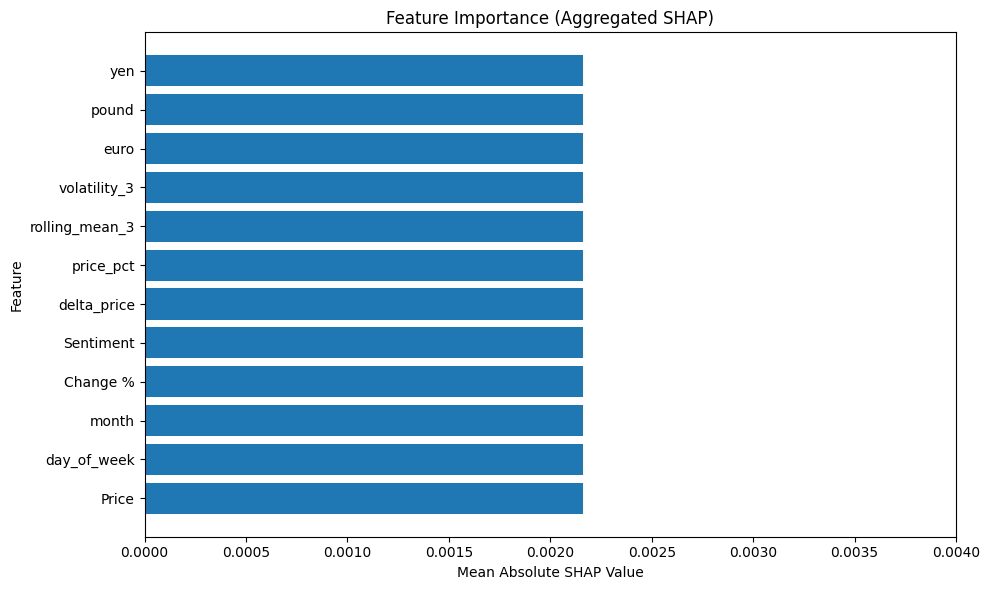

In [25]:
# Collapse over time (axis=1) to get average importance per feature
mean_abs_shap = np.abs(shap_values[0]).mean(axis=1).mean(axis=0)

# Get column names
columns = df_input.columns.tolist()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(columns, mean_abs_shap)
plt.title("Feature Importance (Aggregated SHAP)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.xlim(0,0.004)
plt.tight_layout()
plt.show()


### Let's Make graph based model baby

### 'Price','day_of_week','month'

In [31]:
from datetime import timedelta
import pandas as pd
import numpy as np
import time

rolling_X_val = df.copy()

for _ in range(15):
    rolling_X_val = rolling_X_val[['Date', 'Price']]

    rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)
    rolling_X_val['day_of_week'] = rolling_X_val['Date'].dt.weekday
    rolling_X_val['month'] = rolling_X_val['Date'].dt.month

    current_sequence = rolling_X_val[-7:]
    current_sequence_pro = current_sequence[['Price', 'day_of_week', 'month']]

    current_sequence_scaled = scaler.transform(current_sequence_pro)

    current_sequence_scaled = current_sequence_scaled.reshape(1, 7, 3)

    predict = model.predict(current_sequence_scaled)
    predict_real = target_scaler.inverse_transform(predict)[0][0]  # ✅ get scalar

    last_date = rolling_X_val['Date'].iloc[-1]
    tomorrow = last_date + timedelta(days=1)
    next_day_of_week = tomorrow.weekday()
    next_month = tomorrow.month

    new_row = {'Date': tomorrow,'Price': predict_real,'day_of_week': next_day_of_week,'month': next_month}

    rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

    print(f"{tomorrow.strftime('%Y-%m-%d')} → ${predict_real:.4f}")
    
    new_price = rolling_X_val['Price'].iloc[-1]
    last_price = rolling_X_val['Price'].iloc[-2]
    dev = new_price - last_price
    print(f'The deviation of Price is {dev:.2f}')
    if last_price > new_price:
        print("Price Decreased")
    else:
        print("Price Increased")

    time.sleep(5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2025-06-25 → $85.5656
The deviation of Price is -0.49
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-06-26 → $85.4295
The deviation of Price is -0.14
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2025-06-27 → $85.2902
The deviation of Price is -0.14
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2025-06-28 → $85.1478
The deviation of Price is -0.14
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2025-06-29 → $84.9077
The deviation of Price is -0.24
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-06-30 → $84.5765
The deviation of Price is -0.33
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-07-01 → $83.8158
The deviation of Price is -0.76
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2025-07-02 → $83.2985
The deviation of Price is -0.52
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-03 → $83.0363
The deviation of Price is -0.26
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
from flask import Flask, jsonify
import threading
from datetime import timedelta
import time
from flask import Flask, jsonify, send_from_directory
import os

# Serve the HTML page from the same folder
@app.route('/')
def serve_interface():
    return send_from_directory(
        directory=r'C:\Users\katka\Downloads\Dollor_Predictor',
        path='interface_try.html'
    )

# Serve the background image too (optional)
@app.route('/<path:filename>')
def serve_static(filename):
    return send_from_directory(r'C:\Users\katka\Downloads\Dollor_Predictor', filename)





app = Flask(__name__)
predicted_data = []

def prediction_loop():
    global rolling_X_val

    for _ in range(15):
        rolling_X_val = rolling_X_val[['Date', 'Price']]
        rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)
        rolling_X_val['day_of_week'] = rolling_X_val['Date'].dt.weekday
        rolling_X_val['month'] = rolling_X_val['Date'].dt.month

        current_sequence = rolling_X_val[-7:]
        current_sequence_pro = current_sequence[['Price', 'day_of_week', 'month']]
        current_sequence_scaled = scaler.transform(current_sequence_pro).reshape(1, 7, 3)

        predict = model.predict(current_sequence_scaled, verbose=0)
        predict_real = target_scaler.inverse_transform(predict)[0][0]

        last_date = rolling_X_val['Date'].iloc[-1]
        tomorrow = last_date + timedelta(days=1)
        next_day_of_week = tomorrow.weekday()
        next_month = tomorrow.month

        new_row = {
            'Date': tomorrow,
            'Price': predict_real,
            'day_of_week': next_day_of_week,
            'month': next_month
        }

        rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

        new_price = rolling_X_val['Price'].iloc[-1]
        last_price = rolling_X_val['Price'].iloc[-2]
        dev = new_price - last_price

        if last_price > new_price:
            status = "Decreased"
            print("Price Decreased")
        else:
            status = "Increased"
            print("Price Increased")

        print(f'The deviation of Price is {dev:.2f}')

        predicted_data.append({
            'date': tomorrow.strftime('%Y-%m-%d'),
            'price': round(predict_real, 4),
            'deviation': round(dev, 2),
            'status': status
        })

        time.sleep(5)

@app.route('/latest-price')
def get_latest():
    return jsonify(predicted_data[-10:])

def run_flask():
    app.run(port=5000, use_reloader=False)

# Start both threads from Jupyter cell
threading.Thread(target=prediction_loop, daemon=True).start()
threading.Thread(target=run_flask, daemon=True).start()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


Price Increased
The deviation of Price is 0.13
Price Increased
The deviation of Price is 0.16
Price Decreased
The deviation of Price is -0.78
Price Decreased
The deviation of Price is -0.48
Price Decreased
The deviation of Price is -0.24
Price Decreased
The deviation of Price is -0.06
Price Increased
The deviation of Price is 0.07
Price Increased
The deviation of Price is 0.16
Price Increased
The deviation of Price is 0.22
Price Decreased
The deviation of Price is -0.70
Price Decreased
The deviation of Price is -0.44
Price Decreased
The deviation of Price is -0.22
Price Decreased
The deviation of Price is -0.05
Price Increased
The deviation of Price is 0.08
Price Increased
The deviation of Price is 0.19


## Baising Experiments with setiment

In [ ]:

df = pd.read_csv(r"C:\Users\katka\Downloads\Dollor_Predictor\USD_INR Historical Data (1).csv")

df = df[::-1].reset_index(drop=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['day_of_week'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month

df['Change %'] = df['Change %'].str.replace('%','').astype(float)

#gpt suggestions
df['delta_price'] = df['Price'].diff()
df['price_pct'] = df['Price'].pct_change()
df['rolling_mean_3'] = df['Price'].rolling(3).mean()
df['volatility_3'] = df['Price'].rolling(3).std()
df['euro'] = df['Price']*0.00999962
df['pound'] = df['Price']*0.008527
df['yen'] = df['Price']*1.69146

import pandas as pd
import random
from datetime import datetime, timedelta

df['Date'] = pd.to_datetime(df['Date']).dt.date

#df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

df['Sentiment'] = 0.0
cutoff_date = datetime.today().date() - timedelta(days=30)

# Step 1: Define a scaling function for 'Change %' → sentiment (-0.3 to 0.3)
def scale_change_to_sentiment(change):
    change = max(min(change, 1), -1)
    base = (change / 1) * 0.3
    noise = random.uniform(-0.02, 0.02) 
    return round(base + noise, 3)


for idx, row in df.iterrows():
    if row['Date'] < cutoff_date:
        scaled_sentiment = scale_change_to_sentiment(row['Change %'])
        df.at[idx, 'Sentiment'] = scaled_sentiment


print(df.head())

analyzer = SentimentIntensityAnalyzer()

url = "https://newsapi.org/v2/everything"
params = {
    'q': 'indian rupee OR USD OR forex OR RBI OR dollar',
    'language': 'en',
    'sortBy': 'publishedAt',
    'pageSize': 5,  
    'apiKey': 'cb0e07a51f4a405590d9e324f6e3b309' 
}

reposnse = requests.get(url, params=params)
data = reposnse.json()

headlines = []
if 'articles' in data:
    for article in data['articles']:
        title = article['title']
        date_str = article['publishedAt']  # format: 2024-06-26T12:00:00Z
        date = datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ").date()
        headlines.append((date, title))
        
sentiment_by_date = {}

for date,title in headlines:
    sentiment = analyzer.polarity_scores(title)['compound']
    if date not in sentiment_by_date:
        sentiment_by_date[date] = []
    sentiment_by_date[date].append(sentiment)
    
    
avg_setiment_by_date = {date: np.mean(sentiments) for date, sentiments in sentiment_by_date.items()}

for date, avg_score in avg_setiment_by_date.items():
    print(f"Date: {date}, Average Sentiment Score: {avg_score:.4f}")

#['Open', 'High', 'Low','Change %','day_of_week','month']
df_input = df[['Price','day_of_week','month','Change %','Sentiment','delta_price','price_pct','rolling_mean_3','volatility_3','euro','pound','yen']]
df_output = df['Change %']
df_input['Sentiment'] *= 10

df_input = df_input.dropna()
print(df_input.head())

scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)
target_scaler = MinMaxScaler()
df_output_scaled = target_scaler.fit_transform(df_output.values.reshape(-1, 1))


X = []
y = []
sequence_len = 14

for i in range(len(df_input_scaled) - sequence_len):
    X.append(df_input_scaled[i:i+sequence_len])
    y.append(df_output_scaled[i+sequence_len])
    
X = np.array(X)
y = np.array(y)

split_idx = int(len(X)*0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

optimizer = keras.optimizers.Adam(learning_rate=0.001)#, beta_1=0.9, beta_2=0.9


model = keras.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=(14,12)),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

         Date   Price    Open    High     Low  Vol.  Change %  day_of_week  \
0  2021-01-01  73.125  73.100  73.130  73.025   NaN      0.10            4   
1  2021-01-04  73.080  73.089  73.125  72.827   NaN     -0.06            0   
2  2021-01-05  73.130  73.065  73.291  72.987   NaN      0.07            1   
3  2021-01-06  73.136  73.184  73.234  73.055   NaN      0.01            2   
4  2021-01-07  73.430  73.169  73.475  73.065   NaN      0.40            3   

   month  delta_price  price_pct  rolling_mean_3  volatility_3      euro  \
0      1          NaN        NaN             NaN           NaN  0.731222   
1      1       -0.045  -0.000615             NaN           NaN  0.730772   
2      1        0.050   0.000684       73.111667      0.027538  0.731272   
3      1        0.006   0.000082       73.115333      0.030746  0.731332   
4      1        0.294   0.004020       73.232000      0.171499  0.734272   

      pound         yen  Sentiment  
0  0.623537  123.688012      0.044  


C:\Users\katka\AppData\Local\Temp\ipykernel_17308\2221549366.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['Sentiment'] *= 10
c:\Users\katka\anaconda3\envs\rnn_doller\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
df_input = df[['Price','day_of_week','month','Change %','Sentiment','delta_price','price_pct','rolling_mean_3','volatility_3','euro','pound','yen']]
df_output = df['Change %']
df_input['Sentiment'] *= 10

df_input = df_input.dropna()
print(df_input.head())

scaler = MinMaxScaler()
df_input_scaled = scaler.fit_transform(df_input)
target_scaler = MinMaxScaler()
df_output_scaled = target_scaler.fit_transform(df_output.values.reshape(-1, 1))


X = []
y = []
sequence_len = 14

for i in range(len(df_input_scaled) - sequence_len):
    X.append(df_input_scaled[i:i+sequence_len])
    y.append(df_output_scaled[i+sequence_len])
    
X = np.array(X)
y = np.array(y)

split_idx = int(len(X)*0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

optimizer = keras.optimizers.Adam(learning_rate=0.001)#, beta_1=0.9, beta_2=0.9

    Price  Change %  Sentiment
0  73.125      0.10      0.044
1  73.080     -0.06     -0.031
2  73.130      0.07      0.013
3  73.136      0.01      0.007
4  73.430      0.40      0.134


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, Concatenate, Lambda

import tensorflow as tf

inp = Input(shape=(14, 3))  # your full input

# Split Sentiment from other features
sentiment = Lambda(lambda x: x[:, :, 4:5])(inp)  # index 4 = Sentiment
other = Lambda(lambda x: tf.concat([x[:, :, :4], x[:, :, 5:]], axis=-1))(inp)

# Process sentiment separately
sent_path = GRU(4)(sentiment)

# Process rest of the input
main_path = GRU(20, return_sequences=True)(other)
main_path = GRU(20)(main_path)

# Combine
combined = Concatenate()([main_path, sent_path])
out = Dense(1)(combined)

model = Model(inputs=inp, outputs=out)


In [6]:

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])

In [7]:
history = model.fit(X_train,y_train, epochs=40,validation_data=[X_val,y_val],batch_size=20)

Epoch 1/40


: 

In [13]:
y_pred_scaled = model.predict(X_val)
y_pred_real = target_scaler.inverse_transform(y_pred_scaled)
y_val_real = target_scaler.inverse_transform(y_val)


for i in range(10):
    print(f"Predicted: {y_pred_real[i][0]:.2f} | Actual: {y_val_real[i][0]:.2f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Predicted: 0.08 | Actual: -0.02
Predicted: 0.05 | Actual: 0.04
Predicted: 0.02 | Actual: 0.03
Predicted: 0.02 | Actual: 0.00
Predicted: 0.04 | Actual: -0.07
Predicted: 0.09 | Actual: 0.08
Predicted: 0.06 | Actual: -0.02
Predicted: 0.04 | Actual: -0.13
Predicted: 0.04 | Actual: -0.09
Predicted: 0.06 | Actual: 0.04


In [14]:
import shap
import numpy as np

# Pick a subset of your input data for SHAP
X_summary = X_train[:100]  # SHAP background dataset
X_sample = X_val[:10]      # Sample for explanation

# Flatten the sequence data for SHAP (samples, sequence_len * num_features)
X_summary_flat = X_summary.reshape((X_summary.shape[0], -1))
X_sample_flat = X_sample.reshape((X_sample.shape[0], -1))

# Define a prediction function that reshapes input back to (samples, seq_len, features)
def predict_fn(x):
    x_reshaped = x.reshape((-1, X_train.shape[1], X_train.shape[2]))
    return model.predict(x_reshaped, verbose=0)

# Initialize SHAP explainer (slow but works with any model)
explainer = shap.KernelExplainer(predict_fn, X_summary_flat)

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample_flat)

# shape: (num_samples, sequence_length * num_features)
print(np.array(shap_values).shape)


  0%|          | 0/10 [00:00<?, ?it/s]

(10, 70, 1)


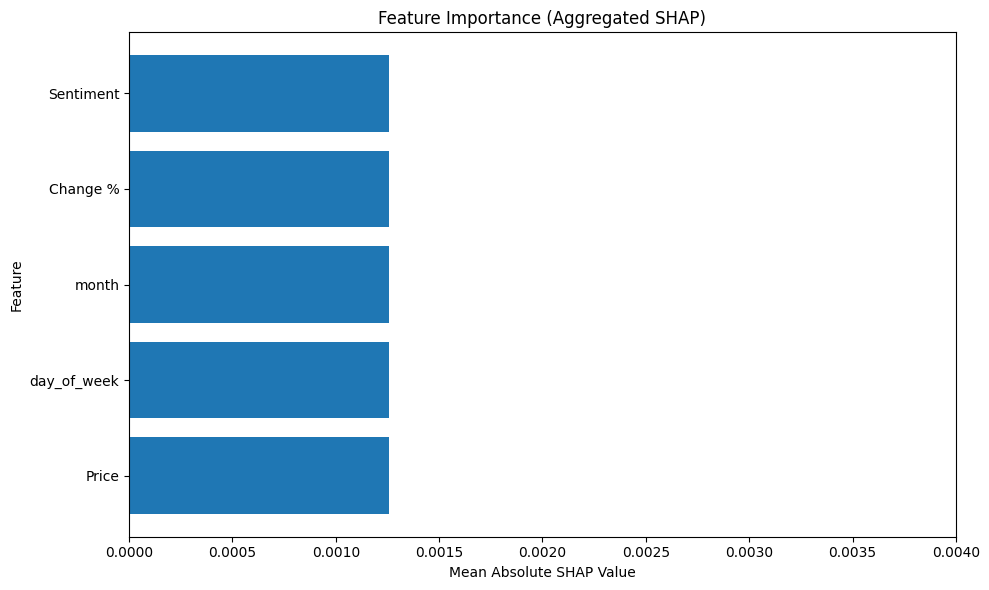

In [15]:
# Collapse over time (axis=1) to get average importance per feature
mean_abs_shap = np.abs(shap_values[0]).mean(axis=1).mean(axis=0)

# Get column names
columns = df_input.columns.tolist()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(columns, mean_abs_shap)
plt.title("Feature Importance (Aggregated SHAP)")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.xlim(0,0.004)
plt.tight_layout()
plt.show()


## Dollar to JPY

In [3]:
#jpy = pd.read_csv(r"C:\Users\katka\Downloads\Dollor_Predictor\USD_INR Historical Data (1).csv")

import pandas as pd
import random
from datetime import datetime, timedelta

jpy = pd.read_csv(r"C:\Users\katka\Downloads\USD_JPY Historical Data.csv")
jpy

# Convert Date to datetime.date format
jpy['Date'] = pd.to_datetime(jpy['Date']).dt.date

# Clean and convert 'Change %' from string to float
jpy['Change %'] = jpy['Change %'].str.replace('%', '').astype(float)

# Create a sentiment column
jpy['Sentiment'] = 0.0

# Define 30-day cutoff


jpy = jpy[::-1].reset_index(drop=True)

jpy['Date'] = pd.to_datetime(jpy['Date'], dayfirst=True)
jpy['day_of_week'] = jpy['Date'].dt.weekday
jpy['month'] = jpy['Date'].dt.month

#jpy['Change %'] = jpy['Change %'].str.replace('%','').astype(float)

#gpt suggestions
jpy['delta_price'] = jpy['Price'].diff()
jpy['price_pct'] = jpy['Price'].pct_change()
jpy['rolling_mean_3'] = jpy['Price'].rolling(3).mean()
jpy['volatility_3'] = jpy['Price'].rolling(3).std()


print(jpy.head())

#['Open', 'High', 'Low','Change %','day_of_week','month']
jpy_input = jpy[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
jpy_output = jpy['Change %']

jpy_input = jpy_input.dropna()
print(jpy_input.head())

scaler = MinMaxScaler()
jpy_input_scaled = scaler.fit_transform(jpy_input)
target_scaler = MinMaxScaler()
jpy_output_scaled = target_scaler.fit_transform(jpy_output.values.reshape(-1, 1))

# conveting sequence

X = []
y = []
sequence_len = 30

for i in range(len(jpy_input_scaled) - sequence_len):
    X.append(jpy_input_scaled[i:i+sequence_len])
    y.append(jpy_output_scaled[i+sequence_len])
    
X = np.array(X)
y = np.array(y)

split_idx = int(len(X)*0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]


optimizer = keras.optimizers.Adam(learning_rate=0.001)

model = keras.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=(14,8)),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])


history = model.fit(X_train,y_train, epochs=40,validation_data=[X_val,y_val],batch_size=20)



y_pred_scaled = model.predict(X_val)
y_pred_real = target_scaler.inverse_transform(y_pred_scaled)
y_val_real = target_scaler.inverse_transform(y_val)


for i in range(10):
    print(f"Predicted: {y_pred_real[i][0]:.2f} | Actual: {y_val_real[i][0]:.2f}")


C:\Users\katka\AppData\Local\Temp\ipykernel_17368\405838385.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  jpy['Date'] = pd.to_datetime(jpy['Date']).dt.date


        Date   Price    Open    High     Low  Vol.  Change %  Sentiment  \
0 2021-01-25  103.73  103.80  103.95  103.67   NaN     -0.04        0.0   
1 2021-01-26  103.60  103.74  103.84  103.55   NaN     -0.13        0.0   
2 2021-01-27  104.09  103.62  104.21  103.58   NaN      0.47        0.0   
3 2021-01-28  104.21  104.11  104.47  104.06   NaN      0.12        0.0   
4 2021-01-29  104.68  104.24  104.95  104.22   NaN      0.45        0.0   

   day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
0            0      1          NaN        NaN             NaN           NaN  
1            1      1        -0.13  -0.001253             NaN           NaN  
2            2      1         0.49   0.004730      103.806667      0.253837  
3            3      1         0.12   0.001153      103.966667      0.323161  
4            4      1         0.47   0.004510      104.326667      0.311823  
    Price  day_of_week  month  Change %  delta_price  price_pct  \
2  104.09     

c:\Users\katka\anaconda3\envs\rnn_doller\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.1398 - mean_absolute_error: 0.2951 - val_loss: 0.0130 - val_mean_absolute_error: 0.0879
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0128 - mean_absolute_error: 0.0841 - val_loss: 0.0129 - val_mean_absolute_error: 0.0870
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0874 - val_loss: 0.0131 - val_mean_absolute_error: 0.0890
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0816 - val_loss: 0.0130 - val_mean_absolute_error: 0.0861
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0139 - mean_absolute_error: 0.0833 - val_loss: 0.0129 - val_mean_absolute_error: 0.0867
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0739 - val_loss: 0.0135 - val_mean_absolute_error: 0.0867
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0790 - val_loss

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 14, 20)         │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 14, 20)         │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 20)             │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,865 (89.32 KB)

 Trainable params: 7,621 (29.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,244 (59.55 KB)

In [9]:
jpy.shape

(1170, 14)

In [18]:
from datetime import timedelta
import pandas as pd
import numpy as np
import time

# Copy base
rolling_X_val = jpy.copy()

# Ensure date is datetime
rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)

# Number of future predictions
future_steps = 10

for _ in range(future_steps):
    # --- Step 1: Feature Engineering ---
    temp_df = rolling_X_val[['Date', 'Price', 'Change %']].copy()

    temp_df['day_of_week'] = temp_df['Date'].dt.weekday
    temp_df['month'] = temp_df['Date'].dt.month
    temp_df['delta_price'] = temp_df['Price'].diff()
    temp_df['price_pct'] = temp_df['Price'].pct_change()
    temp_df['rolling_mean_3'] = temp_df['Price'].rolling(3).mean()
    temp_df['volatility_3'] = temp_df['Price'].rolling(3).std()
    
    temp_df.dropna(inplace=True)

    # --- Step 2: Get latest 7 records for prediction ---
    current_sequence = temp_df.tail(30)
    X_input = current_sequence[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
    X_scaled = scaler.transform(X_input).reshape(1, 30, 8)

    # --- Step 3: Predict and inverse scale ---
    y_pred = model.predict(X_scaled)
    predicted_change = target_scaler.inverse_transform(y_pred)[0][0]

    # --- Step 4: Construct new row ---
    last_date = rolling_X_val['Date'].iloc[-1]
    next_date = last_date + timedelta(days=1)
    prev_price = rolling_X_val['Price'].iloc[-1]
    new_price = prev_price + predicted_change
    #change_pct = (predicted_price - prev_price) / prev_price * 100

    new_row = {
        'Date': next_date,
        'Price': new_price,
        'Change %': predicted_change
    }

    # --- Step 5: Append to rolling frame ---
    rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

    # --- Step 6: Output ---
    print(f"{next_date.strftime('%Y-%m-%d')} → ${new_price:.4f}")
    print(f"The deviation of Price is {predicted_change:.2f}")
    print("Price Increased" if new_price > prev_price else "Price Decreased")

    time.sleep(5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2025-07-19 → $148.8262
The deviation of Price is -0.00
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2025-07-20 → $148.6488
The deviation of Price is -0.18
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2025-07-21 → $148.2578
The deviation of Price is -0.39
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-22 → $148.0817
The deviation of Price is -0.18
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-07-23 → $148.1358
The deviation of Price is 0.05
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-24 → $148.3241
The deviation of Price is 0.19
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-25 → $148.5438
The deviation of Price is 0.22
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2025-07-26 → $148.6892
The deviation of Price is 0.15
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2025-07-27 → $148.6721
The deviation of Price is -0.02
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from datetime import timedelta
import pandas as pd
import numpy as np
import time

def forecast_prices(jpy, steps=10):
    # Copy base
     
    rolling_X_val = jpy.copy()

    # Ensure date is datetime
    rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)

    for _ in range(steps):
        # --- Step 1: Feature Engineering ---
        temp_df = rolling_X_val[['Date', 'Price', 'Change %']].copy()

        temp_df['day_of_week'] = temp_df['Date'].dt.weekday
        temp_df['month'] = temp_df['Date'].dt.month
        temp_df['delta_price'] = temp_df['Price'].diff()
        temp_df['price_pct'] = temp_df['Price'].pct_change()
        temp_df['rolling_mean_3'] = temp_df['Price'].rolling(3).mean()
        temp_df['volatility_3'] = temp_df['Price'].rolling(3).std()
        
        temp_df.dropna(inplace=True)

        # --- Step 2: Get latest 30 records for prediction ---
        current_sequence = temp_df.tail(30)
        X_input = current_sequence[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
        X_scaled = scaler.transform(X_input).reshape(1, 30, 8)

        # --- Step 3: Predict and inverse scale ---

        y_pred = model.predict(X_scaled)
        predicted_change = target_scaler.inverse_transform(y_pred)[0][0]

        # --- Step 4: Construct new row ---
        last_date = rolling_X_val['Date'].iloc[-1]
        next_date = last_date + timedelta(days=1)
        prev_price = rolling_X_val['Price'].iloc[-1]
        new_price = prev_price + predicted_change

        new_row = {
            'Date': next_date,
            'Price': new_price,
            'Change %': predicted_change
        }

        # --- Step 5: Append to rolling frame ---
        rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

        # --- Step 6: Output ---
        print(f"{next_date.strftime('%Y-%m-%d')} → ${new_price:.4f}")
        print(f"The deviation of Price is {predicted_change:.2f}")
        print("Price Increased" if new_price > prev_price else "Price Decreased")

        time.sleep(5)

    return rolling_X_val

final_df = forecast_prices(jpy, steps=10)

In [46]:
final_df = forecast_prices(jpy, steps=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2025-07-19 → $148.9293
The deviation of Price is 0.10
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-20 → $148.9519
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-07-21 → $148.7116
The deviation of Price is -0.24
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2025-07-22 → $148.5722
The deviation of Price is -0.14
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2025-07-23 → $148.5251
The deviation of Price is -0.05
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2025-07-24 → $148.6770
The deviation of Price is 0.15
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-07-25 → $148.9937
The deviation of Price is 0.32
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-07-26 → $149.2912
The deviation of Price is 0.30
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2025-07-27 → $149.4228
The deviation of Price is 0.13
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import joblib
from tensorflow.keras.models import load_model
from datetime import timedelta
import pandas as pd
import numpy as np
import time

def forecast_prices(jpy, model_name="JPY_Price_Forecst_Model", steps=10):
    # Load model and scalers
    model = load_model(f"{model_name}.h5")
    # model.load_weights(f"{model_name}.weights.h5")  # optional if weights are separate
    scaler = joblib.load(f"{model_name}_input_scaler.save")
    target_scaler = joblib.load(f"{model_name}_output_scaler.save")

    # Copy base
    rolling_X_val = jpy.copy()

    # Ensure date is datetime
    rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)

    for _ in range(steps):
        # --- Step 1: Feature Engineering ---
        temp_df = rolling_X_val[['Date', 'Price', 'Change %']].copy()

        temp_df['day_of_week'] = temp_df['Date'].dt.weekday
        temp_df['month'] = temp_df['Date'].dt.month
        temp_df['delta_price'] = temp_df['Price'].diff()
        temp_df['price_pct'] = temp_df['Price'].pct_change()
        temp_df['rolling_mean_3'] = temp_df['Price'].rolling(3).mean()
        temp_df['volatility_3'] = temp_df['Price'].rolling(3).std()

        temp_df.dropna(inplace=True)

        # --- Step 2: Get latest 30 records for prediction ---
        current_sequence = temp_df.tail(30)
        X_input = current_sequence[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
        X_scaled = scaler.transform(X_input).reshape(1, 30, 8)

        # --- Step 3: Predict and inverse scale ---
        y_pred = model.predict(X_scaled)
        predicted_change = target_scaler.inverse_transform(y_pred)[0][0]

        # --- Step 4: Construct new row ---
        last_date = rolling_X_val['Date'].iloc[-1]
        next_date = last_date + timedelta(days=1)
        prev_price = rolling_X_val['Price'].iloc[-1]
        if model_name == "JPY_Price_Forecst_Model":
            new_price = prev_price + predicted_change
        else:
            new_price = prev_price * (1 + predicted_change / 100)
            

        new_row = {
            'Date': next_date,
            'Price': new_price,
            'Change %': predicted_change
        }

        # --- Step 5: Append to rolling frame ---
        rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

        # --- Step 6: Output ---
        print(f"{next_date.strftime('%Y-%m-%d')} → ${new_price:.4f}")
        print(f"The deviation of Price is {predicted_change:.2f}")
        print("Price Increased" if new_price > prev_price else "Price Decreased")
        print(f"The shape is{rolling_X_val.shape}")

        time.sleep(5)

    return rolling_X_val


In [128]:
forecasted_df = forecast_prices(jpy, model_name="JPY_Price_Forecst_Model", steps=10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
2025-07-19 → $148.9293
The deviation of Price is 0.10
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2025-07-20 → $148.9519
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2025-07-21 → $148.7116
The deviation of Price is -0.24
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2025-07-22 → $148.5722
The deviation of Price is -0.14
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2025-07-23 → $148.5251
The deviation of Price is -0.05
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2025-07-24 → $148.6770
The deviation of Price is 0.15
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2025-07-25 → $148.9937
The deviation of Price is 0.32
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2025-07-26 → $149.2912
The deviation of Price is 0.30
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2025-07-27 → $149.4228
The deviation of Price is 0.13
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━

In [49]:
import joblib

model.save("JPY_Price_Forecst_Model.h5")
model.save_weights("JPY_Price_Forecst_Model.weights.h5")

joblib.dump(scaler, "JPY_Price_Forecst_Model_input_scaler.save")
joblib.dump(target_scaler, "JPY_Price_Forecst_Model_output_scaler.save")

['JPY_Price_Forecst_Model_output_scaler.save']

## Pounds

In [119]:
#gbp = pd.read_csv(r"C:\Users\katka\Downloads\Dollor_Predictor\USD_INR Historical Data (1).csv")

import pandas as pd
import random
from datetime import datetime, timedelta

gbp = pd.read_csv(r"C:\Users\katka\Downloads\USD_GBP Historical Data.csv")
gbp

# Convert Date to datetime.date format
gbp['Date'] = pd.to_datetime(gbp['Date']).dt.date

# Clean and convert 'Change %' from string to float
gbp['Change %'] = gbp['Change %'].str.replace('%', '').astype(float)

# Create a sentiment column
gbp['Sentiment'] = 0.0

# Define 30-day cutoff


gbp = gbp[::-1].reset_index(drop=True)

gbp['Date'] = pd.to_datetime(gbp['Date'], dayfirst=True)
gbp['day_of_week'] = gbp['Date'].dt.weekday
gbp['month'] = gbp['Date'].dt.month

#gbp['Change %'] = gbp['Change %'].str.replace('%','').astype(float)

#gpt suggestions
gbp['delta_price'] = gbp['Price'].diff()
gbp['price_pct'] = gbp['Price'].pct_change()
gbp['rolling_mean_3'] = gbp['Price'].rolling(3).mean()
gbp['volatility_3'] = gbp['Price'].rolling(3).std()


print(gbp.head())

#['Open', 'High', 'Low','Change %','day_of_week','month']
gbp_input = gbp[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
gbp_output = gbp['Change %']

gbp_input = gbp_input.dropna()
print(gbp_input.head())

scaler = MinMaxScaler()
gbp_input_scaled = scaler.fit_transform(gbp_input)
target_scaler = MinMaxScaler()
gbp_output_scaled = target_scaler.fit_transform(gbp_output.values.reshape(-1, 1))

# conveting sequence

X = []
y = []
sequence_len = 15

for i in range(len(gbp_input_scaled) - sequence_len):
    X.append(gbp_input_scaled[i:i+sequence_len])
    y.append(gbp_output_scaled[i+sequence_len])
    
X = np.array(X)
y = np.array(y)

split_idx = int(len(X)*0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]


optimizer = keras.optimizers.Adam(learning_rate=0.001)

model = keras.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=(14,8)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])


history = model.fit(X_train,y_train, epochs=40,validation_data=[X_val,y_val],batch_size=20)



y_pred_scaled = model.predict(X_val)
y_pred_real = target_scaler.inverse_transform(y_pred_scaled)
y_val_real = target_scaler.inverse_transform(y_val)


for i in range(10):
    print(f"Predicted: {y_pred_real[i][0]:.2f} | Actual: {y_val_real[i][0]:.2f}")


C:\Users\katka\AppData\Local\Temp\ipykernel_16548\698540840.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gbp['Date'] = pd.to_datetime(gbp['Date']).dt.date
c:\Users\katka\anaconda3\envs\rnn_doller\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


        Date   Price    Open    High     Low     Vol.  Change %  Sentiment  \
0 2021-01-01  0.7313  0.7314  0.7314  0.7308    1.45K      0.03        0.0   
1 2021-01-04  0.7367  0.7318  0.7385  0.7297  131.66K      0.74        0.0   
2 2021-01-05  0.7338  0.7368  0.7378  0.7330  155.21K     -0.39        0.0   
3 2021-01-06  0.7347  0.7339  0.7387  0.7314  150.62K      0.12        0.0   
4 2021-01-07  0.7370  0.7349  0.7390  0.7335  157.30K      0.31        0.0   

   day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
0            4      1          NaN        NaN             NaN           NaN  
1            0      1       0.0054   0.007384             NaN           NaN  
2            1      1      -0.0029  -0.003936        0.733933      0.002702  
3            2      1       0.0009   0.001226        0.735067      0.001484  
4            3      1       0.0023   0.003131        0.735167      0.001650  
    Price  day_of_week  month  Change %  delta_price  price_pct

In [ ]:
from datetime import timedelta
import pandas as pd
import numpy as np
import time

def forecast_prices(jpy, steps=10):
    # Copy base
     
    rolling_X_val = jpy.copy()

    # Ensure date is datetime
    rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)

    for _ in range(steps):
        # --- Step 1: Feature Engineering ---
        temp_df = rolling_X_val[['Date', 'Price', 'Change %']].copy()

        temp_df['day_of_week'] = temp_df['Date'].dt.weekday
        temp_df['month'] = temp_df['Date'].dt.month
        temp_df['delta_price'] = temp_df['Price'].diff()
        temp_df['price_pct'] = temp_df['Price'].pct_change()
        temp_df['rolling_mean_3'] = temp_df['Price'].rolling(3).mean()
        temp_df['volatility_3'] = temp_df['Price'].rolling(3).std()
        
        temp_df.dropna(inplace=True)

        # --- Step 2: Get latest 30 records for prediction ---
        current_sequence = temp_df.tail(100)
        X_input = current_sequence[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
        X_scaled = scaler.transform(X_input).reshape(1, 100, 8)

        # --- Step 3: Predict and inverse scale ---

        y_pred = model.predict(X_scaled)
        predicted_change = target_scaler.inverse_transform(y_pred)[0][0]

        # --- Step 4: Construct new row ---
        last_date = rolling_X_val['Date'].iloc[-1]
        next_date = last_date + timedelta(days=1)
        prev_price = rolling_X_val['Price'].iloc[-1]
        new_price = prev_price * (1 + predicted_change / 100)

        new_row = {
            'Date': next_date,
            'Price': new_price,
            'Change %': predicted_change
        }

        # --- Step 5: Append to rolling frame ---
        rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

        # --- Step 6: Output ---
        print(f"{next_date.strftime('%Y-%m-%d')} → ${new_price:.4f}")
        print(f"The deviation of Price is {predicted_change:.2f}")
        print("Price Increased" if new_price > prev_price else "Price Decreased")

        time.sleep(1)

    return rolling_X_val


final_df = forecast_prices(gbp, steps=10)


In [120]:
final_df = forecast_prices(gbp, steps=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
2025-07-19 → $0.7459
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2025-07-20 → $0.7462
The deviation of Price is 0.03
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-21 → $0.7455
The deviation of Price is -0.09
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2025-07-22 → $0.7450
The deviation of Price is -0.06
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2025-07-23 → $0.7442
The deviation of Price is -0.11
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2025-07-24 → $0.7439
The deviation of Price is -0.04
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2025-07-25 → $0.7440
The deviation of Price is 0.01
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2025-07-26 → $0.7441
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2025-07-27 → $0.7440
The deviation of Price is -0.00
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
20

In [129]:
forecasted_df = forecast_prices(gbp, model_name="GBP_Price_Forecst_Model", steps=10)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
2025-07-19 → $0.7459
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2025-07-20 → $0.7462
The deviation of Price is 0.03
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-07-21 → $0.7455
The deviation of Price is -0.09
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2025-07-22 → $0.7450
The deviation of Price is -0.06
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2025-07-23 → $0.7442
The deviation of Price is -0.11
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2025-07-24 → $0.7439
The deviation of Price is -0.04
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2025-07-25 → $0.7440
The deviation of Price is 0.01
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2025-07-26 → $0.7441
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2025-07-27 → $0.7441
The deviation of Price is -0.00
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
20

In [122]:
import joblib

model.save("GBP_Price_Forecst_Model.h5")
model.save_weights("GBP_Price_Forecst_Model.weights.h5")

joblib.dump(scaler, "GBP_Price_Forecst_Model_input_scaler.save")
joblib.dump(target_scaler, "GBP_Price_Forecst_Model_output_scaler.save")

['GBP_Price_Forecst_Model_output_scaler.save']

In [136]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import joblib

class PredictOnlyForecaster:
    def __init__(self, model_path, input_scaler_path, output_scaler_path):
        self.model = load_model(model_path)
        self.input_scaler = joblib.load(input_scaler_path)
        self.output_scaler = joblib.load(output_scaler_path)
        self.sequence_len = 30

    def create_features(self, df):
        df = df.copy()
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
        df = df[::-1].reset_index(drop=True)

        df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
        df['day_of_week'] = df['Date'].dt.weekday
        df['month'] = df['Date'].dt.month
        df['delta_price'] = df['Price'].diff()
        df['price_pct'] = df['Price'].pct_change()
        df['rolling_mean_3'] = df['Price'].rolling(3).mean()
        df['volatility_3'] = df['Price'].rolling(3).std()

        df = df.dropna()

        X_df = df[['Price', 'day_of_week', 'month', 'Change %', 'delta_price', 'price_pct', 'rolling_mean_3', 'volatility_3']]
        y_df = df['Change %']  # Not used but good to return if needed

        return X_df, y_df

    def prepare_sequences(self, X_scaled):
        X = []
        for i in range(len(X_scaled) - self.sequence_len):
            X.append(X_scaled[i:i + self.sequence_len])
        return np.array(X)

    def predict(self, df):
        X_df, _ = self.create_features(df)
        X_scaled = self.input_scaler.transform(X_df)
        X_seq = self.prepare_sequences(X_scaled)
        preds_scaled = self.model.predict(X_seq, verbose=0)
        preds = self.output_scaler.inverse_transform(preds_scaled)
        return preds.flatten()


In [137]:
gbp = pd.read_csv(r"C:\Users\katka\Downloads\USD_GBP Historical Data.csv")
gbp


,Date,Price,Open,High,Low,Vol.,Change %
0,18-07-2025,0.7458,0.7457,0.7460,0.7420,NaN,0.05%
1,17-07-2025,0.7454,0.7452,0.7478,0.7445,NaN,0.05%
2,16-07-2025,0.7450,0.7472,0.7483,0.7414,NaN,-0.29%
3,15-07-2025,0.7472,0.7447,0.7475,0.7424,NaN,0.34%
4,14-07-2025,0.7447,0.7407,0.7450,0.7402,NaN,0.54%
...,...,...,...,...,...,...,...
1181,07-01-2021,0.7370,0.7349,0.7390,0.7335,157.30K,0.31%
1182,06-01-2021,0.7347,0.7339,0.7387,0.7314,150.62K,0.12%
1183,05-01-2021,0.7338,0.7368,0.7378,0.7330,155.21K,-0.39%
1184,04-01-2021,0.7367,0.7318,0.7385,0.7297,131.66K,0.74%


In [ ]:
import pandas as pd
import numpy as np
from predict_only_pipeline import PredictOnlyForecaster  # Assuming this is your pipeline class
import joblib

# Load your saved forecaster
forecaster = joblib.load(r"C:\Users\katka\Downloads\GBP_Forecaster")

# Number of future days you want to forecast
n_days_to_predict = 10

# Start with your original DataFrame (ensure this is the full historical one)
df_forecast = gbp.copy()  # Already includes 'Date', 'Price', 'Change %' etc.

# Store predictions
forecast_results = []

# Rolling features need enough history — ensure at least sequence_len + rolling window
min_history = forecaster.sequence_len + 3
if len(df_forecast) < min_history:
    raise ValueError(f"Not enough history. Minimum {min_history} rows required.")

for i in range(n_days_to_predict):
    # Predict next change
    predicted_change = forecaster.predict(df_forecast)[-1]  # Take last predicted delta

    # Compute new values
    last_price = df_forecast['Price'].iloc[-1]
    new_price = last_price + predicted_change
    new_date = df_forecast['Date'].iloc[-1] + pd.Timedelta(days=1)

    # Create new row with minimal info; other features will be recomputed by `forecaster.predict`
    new_row = {
        'Date': new_date,
        'Price': new_price,
        'Change %': predicted_change  # Optional: keep it if your feature creation uses it
    }

    # Append to the main DataFrame (used in next loop step)
    df_forecast = pd.concat([df_forecast, pd.DataFrame([new_row])], ignore_index=True)

    # Store forecast info for output
    forecast_results.append({
        'Date': new_date,
        'Predicted Change': predicted_change,
        'New Price': new_price
    })

    # Debug log (optional)
    print(f"[{i+1}] Predicted Change: {predicted_change:.4f}, New Price: {new_price:.4f}, Date: {new_date.date()}")

# Create final forecast DataFrame
forecast_df = pd.DataFrame(forecast_results)

# Display forecasted future values
print("\nForecast Summary:")
print(forecast_df)


KeyError: 72

## Euros 

In [173]:
#eur = pd.read_csv(r"C:\Users\katka\Downloads\Dollor_Predictor\USD_INR Historical Data (1).csv")

import pandas as pd
import random
from datetime import datetime, timedelta

eur = pd.read_csv(r"C:\Users\katka\Downloads\USD_EUR Historical Data (1).csv")
eur
print(eur.shape)
# Convert Date to datetime.date format
eur['Date'] = pd.to_datetime(eur['Date']).dt.date

# Clean and convert 'Change %' from string to float
eur['Change %'] = eur['Change %'].str.replace('%', '').astype(float)

# Create a sentiment column
eur['Sentiment'] = 0.0

# Define 30-day cutoff


eur = eur[::-1].reset_index(drop=True)

eur['Date'] = pd.to_datetime(eur['Date'], dayfirst=True)
eur['day_of_week'] = eur['Date'].dt.weekday
eur['month'] = eur['Date'].dt.month

#eur['Change %'] = eur['Change %'].str.replace('%','').astype(float)

#gpt suggestions
eur['delta_price'] = eur['Price'].diff()
eur['price_pct'] = eur['Price'].pct_change()
eur['rolling_mean_3'] = eur['Price'].rolling(3).mean()
eur['volatility_3'] = eur['Price'].rolling(3).std()


print(eur.head())

#['Open', 'High', 'Low','Change %','day_of_week','month']
eur_input = eur[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
eur_output = eur['Change %']

eur_input = eur_input.dropna()
print(eur_input.shape)

scaler = MinMaxScaler()
eur_input_scaled = scaler.fit_transform(eur_input)
target_scaler = MinMaxScaler()
eur_output_scaled = target_scaler.fit_transform(eur_output.values.reshape(-1, 1))

# conveting sequence

X = []
y = []
sequence_len = 15

for i in range(len(eur_input_scaled) - sequence_len):
    X.append(eur_input_scaled[i:i+sequence_len])
    y.append(eur_output_scaled[i+sequence_len])
    
X = np.array(X)
y = np.array(y)

split_idx = int(len(X)*0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]


optimizer = keras.optimizers.Adam(learning_rate=0.001)

model = keras.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=(14,8)),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.GRU(20),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])


history = model.fit(X_train,y_train, epochs=40,validation_data=[X_val,y_val],batch_size=20)



y_pred_scaled = model.predict(X_val)
y_pred_real = target_scaler.inverse_transform(y_pred_scaled)
y_val_real = target_scaler.inverse_transform(y_val)


for i in range(10):
    print(f"Predicted: {y_pred_real[i][0]:.2f} | Actual: {y_val_real[i][0]:.2f}")


(1190, 7)
        Date   Price    Open    High     Low     Vol.  Change %  Sentiment  \
0 2021-01-01  0.8238  0.8238  0.8238  0.8238      NaN      0.62        0.0   
1 2021-01-04  0.8164  0.8176  0.8181  0.8124  100.67K     -0.90        0.0   
2 2021-01-05  0.8132  0.8166  0.8166  0.8126  107.74K     -0.39        0.0   
3 2021-01-06  0.8113  0.8133  0.8153  0.8098  109.23K     -0.23        0.0   
4 2021-01-07  0.8149  0.8113  0.8167  0.8099  109.24K      0.44        0.0   

   day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
0            4      1          NaN        NaN             NaN           NaN  
1            0      1      -0.0074  -0.008983             NaN           NaN  
2            1      1      -0.0032  -0.003920        0.817800      0.005437  
3            2      1      -0.0019  -0.002336        0.813633      0.002577  
4            3      1       0.0036   0.004437        0.813133      0.001801  
(1188, 8)
Epoch 1/40


C:\Users\katka\AppData\Local\Temp\ipykernel_16548\1431492445.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  eur['Date'] = pd.to_datetime(eur['Date']).dt.date
c:\Users\katka\anaconda3\envs\rnn_doller\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.1828 - val_loss: 0.0125 - val_mean_absolute_error: 0.0837
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.1085 - val_loss: 0.0120 - val_mean_absolute_error: 0.0829
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.1019 - val_loss: 0.0118 - val_mean_absolute_error: 0.0821
Epoch 4/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0997 - val_loss: 0.0120 - val_mean_absolute_error: 0.0823
Epoch 5/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0996 - val_loss: 0.0117 - val_mean_absolute_error: 0.0818
Epoch 6/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0982 - val_loss: 0.0117 - val_mean_absolute_error: 0.0821
Epoch 7/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0896 - val_loss: 0.0118 - 

In [171]:
from datetime import timedelta
import pandas as pd
import numpy as np
import time

def forecast_prices1(jpy, steps=10):
    # Copy base
     
    rolling_X_val = jpy.copy()

    # Ensure date is datetime
    rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)

    for _ in range(steps):
        # --- Step 1: Feature Engineering ---
        temp_df = rolling_X_val[['Date', 'Price', 'Change %']].copy()

        temp_df['day_of_week'] = temp_df['Date'].dt.weekday
        temp_df['month'] = temp_df['Date'].dt.month
        temp_df['delta_price'] = temp_df['Price'].diff()
        temp_df['price_pct'] = temp_df['Price'].pct_change()
        temp_df['rolling_mean_3'] = temp_df['Price'].rolling(3).mean()
        temp_df['volatility_3'] = temp_df['Price'].rolling(3).std()
        
        temp_df.dropna(inplace=True)

        # --- Step 2: Get latest 30 records for prediction ---
        current_sequence = temp_df.tail(30)
        X_input = current_sequence[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
        X_scaled = scaler.transform(X_input).reshape(1, 30, 8)

        # --- Step 3: Predict and inverse scale ---

        y_pred = model.predict(X_scaled)
        predicted_change = target_scaler.inverse_transform(y_pred)[0][0]

        # --- Step 4: Construct new row ---
        last_date = rolling_X_val['Date'].iloc[-1]
        next_date = last_date + timedelta(days=1)
        prev_price = rolling_X_val['Price'].iloc[-1]
        new_price = prev_price * (1 + predicted_change / 100)

        new_row = {
            'Date': next_date,
            'Price': new_price,
            'Change %': predicted_change
        }

        # --- Step 5: Append to rolling frame ---
        rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

        # --- Step 6: Output ---
        print(f"{next_date.strftime('%Y-%m-%d')} → ${new_price:.4f}")
        print(f"The deviation of Price is {predicted_change:.2f}")
        print("Price Increased" if new_price > prev_price else "Price Decreased")

        time.sleep(1)

    return rolling_X_val



In [176]:
final_df = forecast_prices1(eur, steps=30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2025-07-24 → $0.8502
The deviation of Price is -0.30
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2025-07-25 → $0.8509
The deviation of Price is 0.08
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2025-07-26 → $0.8491
The deviation of Price is -0.21
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2025-07-27 → $0.8494
The deviation of Price is 0.03
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2025-07-28 → $0.8475
The deviation of Price is -0.23
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2025-07-29 → $0.8473
The deviation of Price is -0.02
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2025-07-30 → $0.8458
The deviation of Price is -0.17
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2025-07-31 → $0.8460
The deviation of Price is 0.01
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2025-08-01 → $0.8453
The deviation of Price is -0.08
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
20

In [181]:
import joblib

model.save("EUR_Price_Forecst_Model.h5")
model.save_weights("EUR_Price_Forecst_Model.weights.h5")

joblib.dump(scaler, "EUR_Price_Forecst_Model_input_scaler.save")
joblib.dump(target_scaler, "EUR_Price_Forecst_Model_output_scaler.save")

['EUR_Price_Forecst_Model_output_scaler.save']

In [183]:
forecasted_df = forecast_prices(eur, model_name="EUR_Price_Forecst_Model", steps=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
2025-07-24 → $0.8502
The deviation of Price is -0.30
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2025-07-25 → $0.8509
The deviation of Price is 0.08
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-07-26 → $0.8491
The deviation of Price is -0.21
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2025-07-27 → $0.8494
The deviation of Price is 0.03
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-07-28 → $0.8475
The deviation of Price is -0.23
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2025-07-29 → $0.8473
The deviation of Price is -0.02
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2025-07-30 → $0.8458
The deviation of Price is -0.17
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-07-31 → $0.8460
The deviation of Price is 0.01
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-08-01 → $0.8453
The deviation of Price is -0.08
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2

In [184]:
forecasted_df = forecast_prices(jpy, model_name="JPY_Price_Forecst_Model", steps=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
2025-07-19 → $148.9293
The deviation of Price is 0.10
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2025-07-20 → $148.9519
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2025-07-21 → $148.7116
The deviation of Price is -0.24
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2025-07-22 → $148.5722
The deviation of Price is -0.14
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2025-07-23 → $148.5251
The deviation of Price is -0.05
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2025-07-24 → $148.6770
The deviation of Price is 0.15
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2025-07-25 → $148.9937
The deviation of Price is 0.32
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2025-07-26 → $149.2912
The deviation of Price is 0.30
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2025-07-27 → $149.4228
The deviation of Price is 0.13
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━

In [186]:
forecasted_df = forecast_prices(gbp, model_name="GBP_Price_Forecst_Model", steps=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
2025-07-19 → $0.7459
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2025-07-20 → $0.7462
The deviation of Price is 0.03
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2025-07-21 → $0.7455
The deviation of Price is -0.09
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2025-07-22 → $0.7450
The deviation of Price is -0.06
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2025-07-23 → $0.7442
The deviation of Price is -0.11
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2025-07-24 → $0.7439
The deviation of Price is -0.04
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2025-07-25 → $0.7440
The deviation of Price is 0.01
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2025-07-26 → $0.7441
The deviation of Price is 0.02
Price Increased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2025-07-27 → $0.7441
The deviation of Price is -0.00
Price Decreased
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
20

In [190]:
rolling_X_val

,Date,Price,Open,High,Low,Vol.,Change %,Sentiment,day_of_week,month,delta_price,price_pct,rolling_mean_3,volatility_3
0,2021-01-25,103.730000,103.80,103.95,103.67,NaN,-0.040000,0.0,0.0,1.0,NaN,NaN,NaN,NaN
1,2021-01-26,103.600000,103.74,103.84,103.55,NaN,-0.130000,0.0,1.0,1.0,-0.13,-0.001253,NaN,NaN
2,2021-01-27,104.090000,103.62,104.21,103.58,NaN,0.470000,0.0,2.0,1.0,0.49,0.004730,103.806667,0.253837
3,2021-01-28,104.210000,104.11,104.47,104.06,NaN,0.120000,0.0,3.0,1.0,0.12,0.001153,103.966667,0.323161
4,2021-01-29,104.680000,104.24,104.95,104.22,NaN,0.450000,0.0,4.0,1.0,0.47,0.004510,104.326667,0.311823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2025-07-24,148.324107,NaN,NaN,NaN,NaN,0.188272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,2025-07-25,148.543780,NaN,NaN,NaN,NaN,0.219673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,2025-07-26,148.689156,NaN,NaN,NaN,NaN,0.145376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,2025-07-27,148.672128,NaN,NaN,NaN,NaN,-0.017028,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
df = pd.read_csv(r"C:\Users\katka\Downloads\USD_GBP Historical Data.csv")
df.shape


(1186, 7)

In [233]:
import joblib
from tensorflow.keras.models import load_model
from datetime import timedelta
import pandas as pd
import numpy as np
import time

# Make sure jpy is already defined
rolling_X_val = gbp.copy()

def forecast_prices_noloop(rolling_X_val, model_name="JPY_Price_Forecst_Model"):
    # Load model and scalers
    model = load_model(f"{model_name}.h5")
    scaler = joblib.load(f"{model_name}_input_scaler.save")
    target_scaler = joblib.load(f"{model_name}_output_scaler.save")

    # Ensure date is datetime
    rolling_X_val['Date'] = pd.to_datetime(rolling_X_val['Date'], dayfirst=True)

    # --- Step 1: Feature Engineering ---
    temp_df = rolling_X_val[['Date', 'Price', 'Change %']].copy()
    temp_df['day_of_week'] = temp_df['Date'].dt.weekday
    temp_df['month'] = temp_df['Date'].dt.month
    temp_df['delta_price'] = temp_df['Price'].diff()
    temp_df['price_pct'] = temp_df['Price'].pct_change()
    temp_df['rolling_mean_3'] = temp_df['Price'].rolling(3).mean()
    temp_df['volatility_3'] = temp_df['Price'].rolling(3).std()
    temp_df.dropna(inplace=True)

    # --- Step 2: Get latest 30 records ---
    current_sequence = temp_df.tail(30)
    X_input = current_sequence[['Price','day_of_week','month','Change %','delta_price','price_pct','rolling_mean_3','volatility_3']]
    X_scaled = scaler.transform(X_input).reshape(1, 30, 8)

    # --- Step 3: Predict ---
    y_pred = model.predict(X_scaled)
    predicted_change = target_scaler.inverse_transform(y_pred)[0][0]

    # --- Step 4: New row ---
    last_date = rolling_X_val['Date'].iloc[-1]
    next_date = last_date + timedelta(days=1)
    prev_price = rolling_X_val['Price'].iloc[-1]

    if model_name == "JPY_Price_Forecst_Model":
        new_price = prev_price + predicted_change
    else:
        new_price = prev_price * (1 + predicted_change / 100)

    new_row = {
        'Date': next_date,
        'Price': new_price,
        'Change %': predicted_change
    }

    # Append row
    rolling_X_val = pd.concat([rolling_X_val, pd.DataFrame([new_row])], ignore_index=True)

    #print(f"{next_date.strftime('%Y-%m-%d')} → ${new_price:.4f}")
    #print(f"The deviation of Price is {predicted_change:.2f}")
    #print("Price Increased" if new_price > prev_price else "Price Decreased")
    #print(f"Shape: {rolling_X_val.shape}")

    return rolling_X_val, predicted_change, new_price


In [234]:
rolling_X_val = gbp.copy()  # Start with original data

for i in range(10):
    rolling_X_val, predicted_change, new_price = forecast_prices_noloop(rolling_X_val,model_name="GBP_Price_Forecst_Model")
    print(f"Predicted Price: {new_price:.4f} | Change: {predicted_change:.4f}%")
    
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


Predicted Price: 0.7459 | Change: 0.0182%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step


Predicted Price: 0.7462 | Change: 0.0297%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


Predicted Price: 0.7455 | Change: -0.0891%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


Predicted Price: 0.7450 | Change: -0.0594%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


Predicted Price: 0.7442 | Change: -0.1080%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


Predicted Price: 0.7439 | Change: -0.0445%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


Predicted Price: 0.7440 | Change: 0.0089%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


Predicted Price: 0.7441 | Change: 0.0163%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


Predicted Price: 0.7441 | Change: -0.0034%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
Predicted Price: 0.7436 | Change: -0.0581%


In [243]:
import sys
sys.path.append(r"C:\Users\katka\Documents\currency_model_pipeline")  # Run once

from predictor import forecast_prices_noloop

    # Now use it
for i in range(10):
    jpy, change, new_price = forecast_prices_noloop(jpy, model_name="jpy_Price_Forecst_Model")
    print(change,new_price)
    print(f"the val {jpy.tail()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


0.099304065 148.97779018163683
the val            Date      Price    Open    High     Low  Vol.  Change %  Sentiment  \
1166 2025-07-15  148.88000  147.72  149.03  147.55   NaN  0.790000        0.0   
1167 2025-07-16  147.88000  148.90  149.20  146.91   NaN -0.670000        0.0   
1168 2025-07-17  148.62000  147.86  149.10  147.72   NaN  0.500000        0.0   
1169 2025-07-18  148.83000  148.62  148.89  148.18   NaN  0.140000        0.0   
1170 2025-07-19  148.97779     NaN     NaN     NaN   NaN  0.099304        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1166          1.0    7.0         1.17   0.007921      148.003333      0.772938  
1167          2.0    7.0        -1.00  -0.006717      148.156667      0.632166  
1168          3.0    7.0         0.74   0.005004      148.460000      0.518845  
1169          4.0    7.0         0.21   0.001413      148.443333      0.499032  
1170          NaN    NaN          NaN        NaN             NaN     

0.027455006 149.01869039425713
the val            Date      Price    Open    High     Low  Vol.  Change %  Sentiment  \
1167 2025-07-16  147.88000  148.90  149.20  146.91   NaN -0.670000        0.0   
1168 2025-07-17  148.62000  147.86  149.10  147.72   NaN  0.500000        0.0   
1169 2025-07-18  148.83000  148.62  148.89  148.18   NaN  0.140000        0.0   
1170 2025-07-19  148.97779     NaN     NaN     NaN   NaN  0.099304        NaN   
1171 2025-07-20  149.01869     NaN     NaN     NaN   NaN  0.027455        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1167          2.0    7.0        -1.00  -0.006717      148.156667      0.632166  
1168          3.0    7.0         0.74   0.005004      148.460000      0.518845  
1169          4.0    7.0         0.21   0.001413      148.443333      0.499032  
1170          NaN    NaN          NaN        NaN             NaN           NaN  
1171          NaN    NaN          NaN        NaN             NaN     

-0.2307196 148.67487796031213
the val            Date       Price    Open    High     Low  Vol.  Change %  \
1168 2025-07-17  148.620000  147.86  149.10  147.72   NaN  0.500000   
1169 2025-07-18  148.830000  148.62  148.89  148.18   NaN  0.140000   
1170 2025-07-19  148.977790     NaN     NaN     NaN   NaN  0.099304   
1171 2025-07-20  149.018690     NaN     NaN     NaN   NaN  0.027455   
1172 2025-07-21  148.674878     NaN     NaN     NaN   NaN -0.230720   

      Sentiment  day_of_week  month  delta_price  price_pct  rolling_mean_3  \
1168        0.0          3.0    7.0         0.74   0.005004      148.460000   
1169        0.0          4.0    7.0         0.21   0.001413      148.443333   
1170        NaN          NaN    NaN          NaN        NaN             NaN   
1171        NaN          NaN    NaN          NaN        NaN             NaN   
1172        NaN          NaN    NaN          NaN        NaN             NaN   

      volatility_3  
1168      0.518845  
1169      0.499032

-0.14860697 148.4539377246195
the val            Date       Price    Open    High     Low  Vol.  Change %  \
1169 2025-07-18  148.830000  148.62  148.89  148.18   NaN  0.140000   
1170 2025-07-19  148.977790     NaN     NaN     NaN   NaN  0.099304   
1171 2025-07-20  149.018690     NaN     NaN     NaN   NaN  0.027455   
1172 2025-07-21  148.674878     NaN     NaN     NaN   NaN -0.230720   
1173 2025-07-22  148.453938     NaN     NaN     NaN   NaN -0.148607   

      Sentiment  day_of_week  month  delta_price  price_pct  rolling_mean_3  \
1169        0.0          4.0    7.0         0.21   0.001413      148.443333   
1170        NaN          NaN    NaN          NaN        NaN             NaN   
1171        NaN          NaN    NaN          NaN        NaN             NaN   
1172        NaN          NaN    NaN          NaN        NaN             NaN   
1173        NaN          NaN    NaN          NaN        NaN             NaN   

      volatility_3  
1169      0.499032  
1170           NaN

-0.08879158 148.32212096132076
the val            Date       Price  Open  High  Low  Vol.  Change %  Sentiment  \
1170 2025-07-19  148.977790   NaN   NaN  NaN   NaN  0.099304        NaN   
1171 2025-07-20  149.018690   NaN   NaN  NaN   NaN  0.027455        NaN   
1172 2025-07-21  148.674878   NaN   NaN  NaN   NaN -0.230720        NaN   
1173 2025-07-22  148.453938   NaN   NaN  NaN   NaN -0.148607        NaN   
1174 2025-07-23  148.322121   NaN   NaN  NaN   NaN -0.088792        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1170          NaN    NaN          NaN        NaN             NaN           NaN  
1171          NaN    NaN          NaN        NaN             NaN           NaN  
1172          NaN    NaN          NaN        NaN             NaN           NaN  
1173          NaN    NaN          NaN        NaN             NaN           NaN  
1174          NaN    NaN          NaN        NaN             NaN           NaN  
1/1 ━━━━━━━━━━━━━━━━━━━━

0.09870663 148.46852274354254
the val            Date       Price  Open  High  Low  Vol.  Change %  Sentiment  \
1171 2025-07-20  149.018690   NaN   NaN  NaN   NaN  0.027455        NaN   
1172 2025-07-21  148.674878   NaN   NaN  NaN   NaN -0.230720        NaN   
1173 2025-07-22  148.453938   NaN   NaN  NaN   NaN -0.148607        NaN   
1174 2025-07-23  148.322121   NaN   NaN  NaN   NaN -0.088792        NaN   
1175 2025-07-24  148.468523   NaN   NaN  NaN   NaN  0.098707        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1171          NaN    NaN          NaN        NaN             NaN           NaN  
1172          NaN    NaN          NaN        NaN             NaN           NaN  
1173          NaN    NaN          NaN        NaN             NaN           NaN  
1174          NaN    NaN          NaN        NaN             NaN           NaN  
1175          NaN    NaN          NaN        NaN             NaN           NaN  
1/1 ━━━━━━━━━━━━━━━━━━━━ 

0.28276885 148.88833892275568
the val            Date       Price  Open  High  Low  Vol.  Change %  Sentiment  \
1172 2025-07-21  148.674878   NaN   NaN  NaN   NaN -0.230720        NaN   
1173 2025-07-22  148.453938   NaN   NaN  NaN   NaN -0.148607        NaN   
1174 2025-07-23  148.322121   NaN   NaN  NaN   NaN -0.088792        NaN   
1175 2025-07-24  148.468523   NaN   NaN  NaN   NaN  0.098707        NaN   
1176 2025-07-25  148.888339   NaN   NaN  NaN   NaN  0.282769        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1172          NaN    NaN          NaN        NaN             NaN           NaN  
1173          NaN    NaN          NaN        NaN             NaN           NaN  
1174          NaN    NaN          NaN        NaN             NaN           NaN  
1175          NaN    NaN          NaN        NaN             NaN           NaN  
1176          NaN    NaN          NaN        NaN             NaN           NaN  
1/1 ━━━━━━━━━━━━━━━━━━━━ 

0.30058104 149.3358767581078
the val            Date       Price  Open  High  Low  Vol.  Change %  Sentiment  \
1173 2025-07-22  148.453938   NaN   NaN  NaN   NaN -0.148607        NaN   
1174 2025-07-23  148.322121   NaN   NaN  NaN   NaN -0.088792        NaN   
1175 2025-07-24  148.468523   NaN   NaN  NaN   NaN  0.098707        NaN   
1176 2025-07-25  148.888339   NaN   NaN  NaN   NaN  0.282769        NaN   
1177 2025-07-26  149.335877   NaN   NaN  NaN   NaN  0.300581        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1173          NaN    NaN          NaN        NaN             NaN           NaN  
1174          NaN    NaN          NaN        NaN             NaN           NaN  
1175          NaN    NaN          NaN        NaN             NaN           NaN  
1176          NaN    NaN          NaN        NaN             NaN           NaN  
1177          NaN    NaN          NaN        NaN             NaN           NaN  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

0.17003892 149.58980767800267
the val            Date       Price  Open  High  Low  Vol.  Change %  Sentiment  \
1174 2025-07-23  148.322121   NaN   NaN  NaN   NaN -0.088792        NaN   
1175 2025-07-24  148.468523   NaN   NaN  NaN   NaN  0.098707        NaN   
1176 2025-07-25  148.888339   NaN   NaN  NaN   NaN  0.282769        NaN   
1177 2025-07-26  149.335877   NaN   NaN  NaN   NaN  0.300581        NaN   
1178 2025-07-27  149.589808   NaN   NaN  NaN   NaN  0.170039        NaN   

      day_of_week  month  delta_price  price_pct  rolling_mean_3  volatility_3  
1174          NaN    NaN          NaN        NaN             NaN           NaN  
1175          NaN    NaN          NaN        NaN             NaN           NaN  
1176          NaN    NaN          NaN        NaN             NaN           NaN  
1177          NaN    NaN          NaN        NaN             NaN           NaN  
1178          NaN    NaN          NaN        NaN             NaN           NaN  
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Custom finance lexicon
custom_finance_lexicon = {
    # Negative finance terms
    "recession": -3.0,
    "inflation": -2.5,
    "interest rate hike": -2.2,
    "interest rate cut": 2.2,
    "bearish": -2.5,
    "plunged": -2.5,
    "downgrade": -1.8,
    "default": -3.0,
    "debt crisis": -3.0,
    "weak earnings": -2.0,
    "fiscal deficit": -2.0,
    "unemployment": -2.0,
    "headwinds": -2.2,
    "volatility": -1.7,
    "crisis": -2.5,
    "plummets": -2.5,
    "stagflation": -3.0,
    "withdraw": -2.2,
    "stalls": -1.8,
    "fails miserably": -3.2,
    "disappointing": -2.5,
    "disappoints": -2.0,
    "hurting": -2.0,
    "undermining": -2.2,
    "weakens": -1.7,
    "declines": -1.8,
    "crushing": -2.7,
    "miserably": -2.5,
    "dangerously": -2.8,
    "terrible": -3.0,
    "concerns": -1.5,
    "concern": -1.5,
    "fails": -2.5,

    # Positive finance terms
    "bullish": 2.5,
    "surged": 2.0,
    "upgrade": 1.8,
    "strong earnings": 2.0,
    "GDP growth": 1.8,
    "stability": 2.0,
    "resilience": 2.2,
    "confidence": 2.0,
    "support": 1.7,
    "strengthening": 1.8,
    "brilliant": 2.5,
    "exceptional": 2.8,
    "magnificent": 3.0,
    "outstanding": 3.0,
    "wonderfully": 2.7,
    "success": 2.5,
    "successful": 2.5,
    "celebrates": 2.2,
    "thriving": 2.8,
    "record high": 2.0,
    "soars": 2.2,
    "accelerates": 1.8,
    "delighting": 2.5,
    "boosting": 2.2,
    "brilliantly": 2.5
}

# Update analyzer lexicon
analyzer.lexicon.update(custom_finance_lexicon)

# Test sentence
sentence = "RBI interest rate hike may cause inflation but strong earnings support bullish sentiment"
print(analyzer.polarity_scores(sentence))


{'neg': 0.09, 'neu': 0.32, 'pos': 0.59, 'compound': 0.926}
